In [1]:
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def constraint1(x1):
    return (1)*x1 + 1
def constraint2(x2):
    return (1)*x2 + 1
def constraint3(x1, x2, a):
    return (-1)*np.sqrt(x1**2 + x2**2) + a

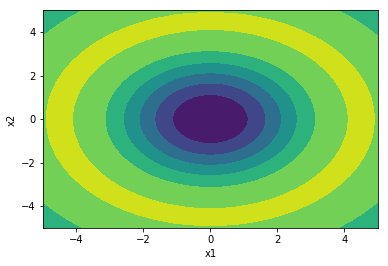

In [3]:
def function(x1, x2):
    return (-1)*np.sin(np.pi*(np.sqrt((x1/np.pi)**2 + (x2/np.pi)**2)))\
            /(np.pi*np.sqrt((x1/np.pi)**2 + (x2/np.pi)**2))
    
x1 = np.linspace(-5,5)
x2 = np.linspace(-5,5)

x1v, x2v = np.meshgrid(x1,x2)
z = function(x1v, x2v)
plt.contourf(x1v,x2v,z)
plt.xlabel('x1')
plt.ylabel('x2')

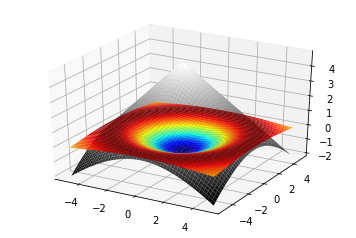

In [4]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm 
c1 = constraint1(x1v)
c2 = constraint2(x2v)
c3 = constraint3(x1v, x2v, 5)
plt.figure()
ax = plt.subplot(111, projection='3d')
ax.plot_surface(x1v,x2v,z, cmap=cm.jet)

ax.plot_surface(x1v, x2v, c3, cmap=cm.gray)

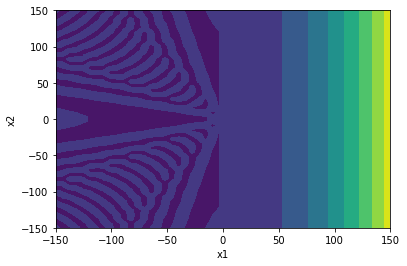

In [5]:
def constrained_function(x1, x2, c):
    return ((-1)*np.sin(np.pi*(np.sqrt((x1/np.pi)**2 + (x2/np.pi)**2)))\
            /(np.pi*np.sqrt((x1/np.pi)**2 + (x2/np.pi)**2))) + \
            c*np.maximum(0, constraint1(x1))**2 + \
            c*np.maximum(0, constraint2(x1))**2 + \
            c*np.maximum(0, constraint3(x1,x2, 5))**2

x1 = np.linspace(-150,150)
x2 = np.linspace(-150,150)

x1v, x2v = np.meshgrid(x1,x2)

z = constrained_function(x1v, x2v, 1)
plt.contourf(x1v,x2v,z)
plt.xlabel('x1')
plt.ylabel('x2')

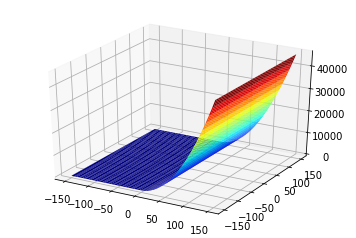

In [6]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm 

plt.figure()
ax = plt.subplot(111, projection='3d')
ax.plot_surface(x1v,x2v,z, cmap=cm.jet)

In [7]:
def create_new_base(direction, lam):
    new_base = np.zeros(direction.shape)
    D = direction.transpose()
    M = lam.transpose()
    Q = np.dot(D, M) #is really matrix multiplication for 2D arrays
    v = np.zeros(direction.shape)
    v[0] = Q[:,0] #as in classical method, first vector is unchanged, only normalized
    new_base[0] = v[0]/np.sqrt(np.dot(v[0].transpose(), v[0]))
    for j in range(1, len(direction)):
        scalar_dir = np.zeros(len(Q[0,:]))
        for k in range(0, j): #here happens the summation of vectors
            p = np.dot(Q[:,j].transpose(), new_base[k, :])
            p = np.multiply(p, new_base[k, :])
            scalar_dir = np.add(scalar_dir,p)
        v[j] = np.subtract(Q[:,j] ,scalar_dir)
        new_base[j] = v[j]/np.sqrt(np.dot(v[j].transpose(), v[j]))
    return new_base

def rosenbrock_method(function, x0, direction, s, alpha, beta, N, verbose, c):
    #alpha - expansion coefficient
    #beta - contraction coefficient
    lam = [0 for i in range(len(direction))] #success list for each direction
    p = [0 for i in range(len(direction))] #failure list for each direction
    i = 0
    x_base = x0
    x_list = []
    while i <= N:
        if verbose: 
            print("ITERATION NUMBER : {}".format(i))
            print("CURRENT MINUMUM : {}".format(x_base))
        for j in range(len(direction)):
            if verbose:
                print("\nCurrent value {}".format(function(x_base, c)))
                print("Value of next_step {}".format(function(np.add(x_base,np.multiply(direction[j],s[j])), c)))
            if function(np.add(x_base,np.multiply(direction[j],s[j])),c) < function(x_base, c):
                #successful step
                if verbose: print("\nSuccess")
                x_base = np.add(x_base,np.multiply(direction[j],s[j]))
                x_list.append(x_base)
                lam[j] = np.add(lam[j],s[j])
                s[j] = np.multiply(alpha,s[j])
            elif function(np.add(x_base,np.multiply(direction[j],s[j])), c) >= function(x_base, c):
                if verbose: print("Failure\n")
                #failed step
                s[j] = (-1)*s[j]*beta
                p[j] = np.add(p[j],1)
            if verbose: print("State of success: {} \nState of failure: {} \nStep is: {}".format(lam, p, s))
        for_all = 0
        if verbose: print("\nInvestigating failures and successes")
        for j in range(len(direction)):
            if verbose: print("Failure [{}] : {}, Success[{}] : {}".format(j, p[j], j, lam[j]))
            if p[j] !=0 and lam[j]!=0:
                for_all += 1
        if verbose: print("Directions for which there was a success and a failure : {}".format(for_all))
        if for_all == len(direction):
            if verbose: print("Change of base\n")
            l = np.zeros((2,2))
            l[0,0] = lam[0]
            l[1,0] = lam[1]
            l[1,1] = lam[1]
            if verbose: print("Triangular matrix: \n{}".format(l))
            direction = create_new_base(direction, l.transpose())  
            if verbose: print("New base is {}\n".format(direction))
            lam = [0 for i in range(len(direction))] #clear
            p = [0 for i in range(len(direction))] #clear
        i = i+1
        if verbose: print("####################################################")
    return x_base, x_list

In [8]:
def target_function(x, c):
    x1 = x[0]
    x2 = x[1]
    return ((-1)*np.sin(np.pi*(np.sqrt((x1/np.pi)**2 + (x2/np.pi)**2)))\
            /(np.pi*np.sqrt((x1/np.pi)**2 + (x2/np.pi)**2))) + \
            c*np.maximum(0, constraint1(x1))**2 + \
            c*np.maximum(0, constraint2(x1))**2 + \
            c*np.maximum(0, constraint3(x1,x2, 5))**2
    

In [9]:
def optimization_with_constraints(function, x0, direction, s, alpha, beta, N, verbose, N2, error):
    j = 0
    x_min = np.array([0.0,0.0])
    x_min[0] = 2*np.random.random() - 1
    x_min[1] = 2*np.random.random() - 1
    c = 0.5
    while j<N2:
        #print(x_min)
        c = 2*c
        minimum, _ = rosenbrock_method(function, x0, direction, s, alpha, beta, N, verbose, c)
        if np.sqrt((x_min[0]-minimum[0])**2 + (x_min[1]-minimum[1])**2) < error:    
            x_min[0] = minimum[0]
            x_min[1] = minimum[1]
            return x_min
        else:
            j += 1
            x_min[0] = minimum[0]
            x_min[1] = minimum[1]
    return x_min    

In [10]:
x0 = np.array([15,9])
s = np.array([0.1,0.1])
direction = np.array([[1.0,0.0], [0.0,1.0]])
x_min = optimization_with_constraints(target_function, x0, direction, s, 3, 0.5, 10, 0, 100, 1e-3)
print(x_min)
#print(x_base)

[-599.44004075    4.1719654 ]


In [11]:
x_init = 100*np.random.random((100,2))-50 #draw x's in the specified interval
s = np.array([0.1,0.1])
direction = np.array([[1.0,0.0], [0.0,1.0]])
minima = []
for xpair in x_init:
    p = optimization_with_constraints(target_function, xpair, direction, s, 3, 0.5, 30, 0, 100, 1e-3)
    minima.append(p)

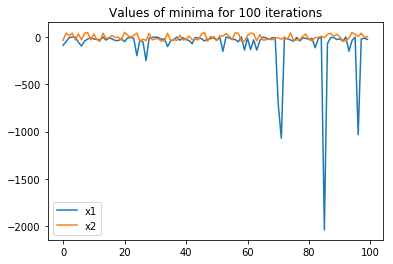

In [12]:
plt.plot(minima)
plt.title("Values of minima for 100 iterations")
plt.legend(['x1', 'x2'])

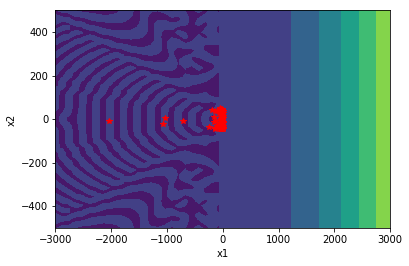

In [16]:
x1 = np.linspace(-3000,3000)
x2 = np.linspace(-500,500)
x1v, x2v = np.meshgrid(x1, x2)
z = constrained_function(x1v, x2v, 5)
plt.contourf(x1v,x2v,z)
x1s = [point[0] for point in minima]
x2s = [point[1] for point in minima]
plt.plot(x1s, x2s, 'r*')
plt.xlabel('x1')
plt.ylabel('x2')